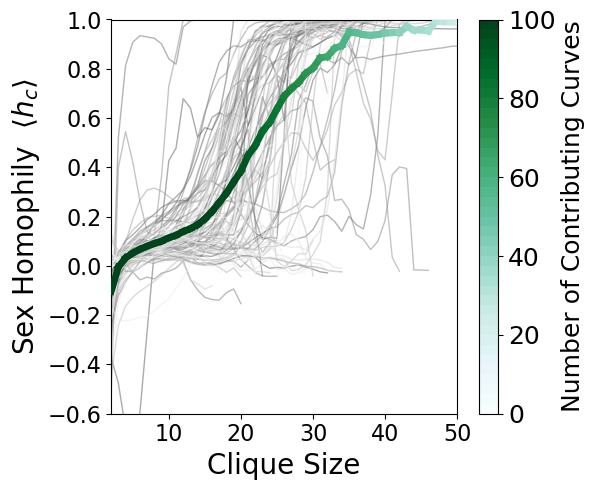

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random, os, math, itertools, time, pickle, json
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

# Load homophily data
homophilies = {}
homophilies_dir = '../data/sex_homophilies'
files = [f for f in os.listdir(homophilies_dir) if f.endswith('_homophily.json')]

for file in files:
    file_path = os.path.join(homophilies_dir, file)
    with open(file_path, 'r') as f:
        data = json.load(f)
        clique_sizes = data['clique_sizes']
        homophily_values = [data['homophily_values'][str(c)] for c in clique_sizes]
        homophilies[file] = (clique_sizes, homophily_values)


def plot_segmented_mean_curve_with_background(homophilies):
    # Step 1: Collect all homophily curves by clique size
    max_clique_size = 0
    all_homophilies = {}
    curves = []  # Store all individual curves for background plotting

    for file, (clique_sizes, homophily_values) in homophilies.items():
        curves.append((clique_sizes, homophily_values))  # Store for background plotting
        for i, clique_size in enumerate(clique_sizes):
            if clique_size not in all_homophilies:
                all_homophilies[clique_size] = []
            all_homophilies[clique_size].append(homophily_values[i])
        max_clique_size = max(max_clique_size, max(clique_sizes))

    # Step 2: Prepare mean and standard deviation for each clique size, starting from x = 0
    clique_sizes = np.arange(0, max_clique_size + 1)  # Ensure x-axis starts from 0 and extends to max size
    mean_values = []
    counts = []

    for clique_size in clique_sizes:
        if clique_size in all_homophilies:
            values = all_homophilies[clique_size]
            mean_values.append(np.mean(values) if len(values) > 0 else np.nan)
            counts.append(len(values))  # Track how many curves contribute to each point
        else:
            mean_values.append(np.nan)  # Fill missing values with NaN
            counts.append(0)  # No contributing curves

    # Optional: Interpolate missing values
    mean_values = np.array(mean_values)
    nan_indices = np.isnan(mean_values)
    if np.any(~nan_indices):  # Only interpolate if we have valid data points
        mean_values[nan_indices] = np.interp(clique_sizes[nan_indices], clique_sizes[~nan_indices], mean_values[~nan_indices])

    # Step 3: Segment the curve based on the number of contributing curves and assign colors
    unique_counts = sorted(set(counts))  # Unique counts of contributing curves
    cmap = ListedColormap(plt.colormaps['BuGn'](np.linspace(0, 1, len(unique_counts))))  # Use color-blind friendly colormap

    plt.figure(figsize=(6, 5))  # Make the figure slightly larger

    # Plot all individual curves in the background with different shades of gray
    num_curves = len(curves)
    for idx, (clique_sizes_curves, homophily_values) in enumerate(curves):
        gray_shade = 0.3 + 0.7 * (idx / num_curves)  # Create varying shades of gray
        plt.plot(clique_sizes_curves, homophily_values, color=(gray_shade, gray_shade, gray_shade), alpha=0.5, linewidth=1)

    # Plot the segmented mean curve
    for i in range(1, len(clique_sizes)):
        # Find the number of contributing curves for this segment
        count = counts[i - 1]
        if np.isnan(mean_values[i-1]) or np.isnan(mean_values[i]):
            continue  # Skip segments where data is missing

        # Get the color based on the count
        color = cmap(unique_counts.index(count))

        # Plot the segment of the curve
        plt.plot(clique_sizes[i-1:i+1], mean_values[i-1:i+1], color=color, linewidth=5, zorder=3)  # Thicker line for visibility

    # Set colorbar to reflect the number of contributing curves
    norm = plt.Normalize(vmin=min(unique_counts), vmax=max(unique_counts))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # ScalarMappable needs a dummy array for colorbar
    cbar = plt.colorbar(sm, ax=plt.gca(), label='Number of Contributing Curves', orientation='vertical')  # Larger colorbar title
    cbar.ax.tick_params(labelsize=18)  # Increase colorbar tick size
    cbar.set_label('Number of Contributing Curves', fontsize=18)  # Increase colorbar label size

    # Set axes limits and labels
    plt.xlim(2, 50)  # Ensure x-axis starts from 0 explicitly
    plt.ylim(-0.6, 1)

    plt.xlabel('Clique Size', fontsize=20)  # Larger x-axis label
    plt.ylabel(r'Sex Homophily  $\langle h_c \rangle$', fontsize=20)  # Larger y-axis label

    # Adjust tick sizes and style to make them larger and more readable
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    # Grid
    plt.grid(False)

    # Tighten layout and save the figure using full white space
    plt.tight_layout()
    plt.savefig('../results/2c.pdf', bbox_inches='tight')  # Use the full white space
    plt.show()

# Example usage
# Load your homophilies data here

# Plot the segmented mean curve with background curves
plot_segmented_mean_curve_with_background(homophilies)

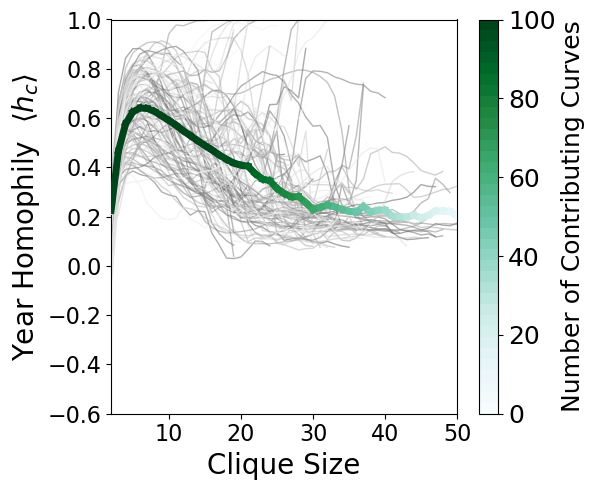

In [6]:
# Load homophily data
homophilies = {}
homophilies_dir = '../data/year_homophilies'
files = [f for f in os.listdir(homophilies_dir) if f.endswith('_homophily.json')]


for file in files:
    file_path = os.path.join(homophilies_dir, file)
    with open(file_path, 'r') as f:
        data = json.load(f)
        clique_sizes = data['clique_sizes']
        homophily_values = [data['homophily_values'][str(c)] for c in clique_sizes]
        homophilies[file] = (clique_sizes, homophily_values)


def plot_segmented_mean_curve_with_background(homophilies):
    # Step 1: Collect all homophily curves by clique size
    max_clique_size = 0
    all_homophilies = {}
    curves = []  # Store all individual curves for background plotting

    for file, (clique_sizes, homophily_values) in homophilies.items():
        curves.append((clique_sizes, homophily_values))  # Store for background plotting
        for i, clique_size in enumerate(clique_sizes):
            if clique_size not in all_homophilies:
                all_homophilies[clique_size] = []
            all_homophilies[clique_size].append(homophily_values[i])
        max_clique_size = max(max_clique_size, max(clique_sizes))

    # Step 2: Prepare mean and standard deviation for each clique size, starting from x = 0
    clique_sizes = np.arange(0, max_clique_size + 1)  # Ensure x-axis starts from 0 and extends to max size
    mean_values = []
    counts = []

    for clique_size in clique_sizes:
        if clique_size in all_homophilies:
            values = all_homophilies[clique_size]
            mean_values.append(np.mean(values) if len(values) > 0 else np.nan)
            counts.append(len(values))  # Track how many curves contribute to each point
        else:
            mean_values.append(np.nan)  # Fill missing values with NaN
            counts.append(0)  # No contributing curves

    # Optional: Interpolate missing values
    mean_values = np.array(mean_values)
    nan_indices = np.isnan(mean_values)
    if np.any(~nan_indices):  # Only interpolate if we have valid data points
        mean_values[nan_indices] = np.interp(clique_sizes[nan_indices], clique_sizes[~nan_indices], mean_values[~nan_indices])

    # Step 3: Segment the curve based on the number of contributing curves and assign colors
    unique_counts = sorted(set(counts))  # Unique counts of contributing curves
    cmap = ListedColormap(plt.colormaps['BuGn'](np.linspace(0, 1, len(unique_counts))))  # Use color-blind friendly colormap

    plt.figure(figsize=(6, 5))  # Make the figure slightly larger

    # Plot all individual curves in the background with different shades of gray
    num_curves = len(curves)
    for idx, (clique_sizes_curves, homophily_values) in enumerate(curves):
        gray_shade = 0.3 + 0.7 * (idx / num_curves)  # Create varying shades of gray
        plt.plot(clique_sizes_curves, homophily_values, color=(gray_shade, gray_shade, gray_shade), alpha=0.5, linewidth=1)

    # Plot the segmented mean curve
    for i in range(1, len(clique_sizes)):
        # Find the number of contributing curves for this segment
        count = counts[i - 1]
        if np.isnan(mean_values[i-1]) or np.isnan(mean_values[i]):
            continue  # Skip segments where data is missing

        # Get the color based on the count
        color = cmap(unique_counts.index(count))

        # Plot the segment of the curve
        plt.plot(clique_sizes[i-1:i+1], mean_values[i-1:i+1], color=color, linewidth=5, zorder=3)  # Thicker line for visibility

    # Set colorbar to reflect the number of contributing curves
    norm = plt.Normalize(vmin=min(unique_counts), vmax=max(unique_counts))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # ScalarMappable needs a dummy array for colorbar
    cbar = plt.colorbar(sm, ax=plt.gca(), label='Number of Contributing Curves', orientation='vertical')  # Larger colorbar title
    cbar.ax.tick_params(labelsize=18)  # Increase colorbar tick size
    cbar.set_label('Number of Contributing Curves', fontsize=18)  # Increase colorbar label size

    # Set axes limits and labels
    plt.xlim(2, 50)  # Ensure x-axis starts from 0 explicitly
    plt.ylim(-0.6, 1)

    plt.xlabel('Clique Size', fontsize=20)  # Larger x-axis label
    plt.ylabel(r'Year Homophily  $\langle h_c \rangle$', fontsize=20)  # Larger y-axis label

    # Adjust tick sizes and style to make them larger and more readable
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    # Grid
    plt.grid(False)

    # Tighten layout and save the figure using full white space
    plt.tight_layout()
    plt.savefig('../results/2e.pdf', bbox_inches='tight')  # Use the full white space
    plt.show()

# Example usage
# Load your homophilies data here

# Plot the segmented mean curve with background curves
plot_segmented_mean_curve_with_background(homophilies)

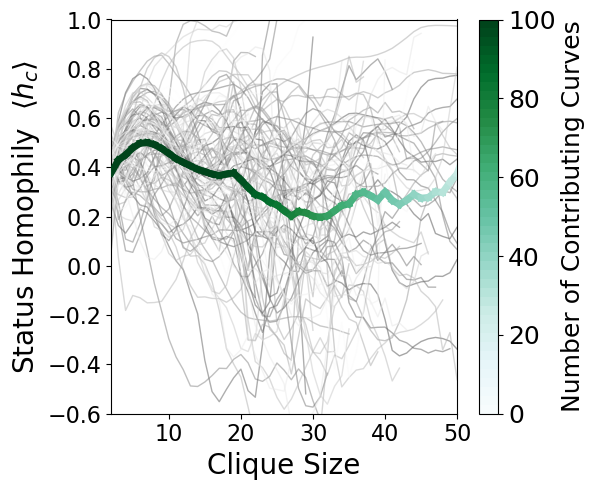

In [7]:
# Load homophily data
homophilies = {}
homophilies_dir = '../data/stat_homophilies'
files = [f for f in os.listdir(homophilies_dir) if f.endswith('_homophily.json')]


for file in files:
    file_path = os.path.join(homophilies_dir, file)
    with open(file_path, 'r') as f:
        data = json.load(f)
        clique_sizes = data['clique_sizes']
        homophily_values = [data['homophily_values'][str(c)] for c in clique_sizes]
        homophilies[file] = (clique_sizes, homophily_values)


def plot_segmented_mean_curve_with_background(homophilies):
    # Step 1: Collect all homophily curves by clique size
    max_clique_size = 0
    all_homophilies = {}
    curves = []  # Store all individual curves for background plotting

    for file, (clique_sizes, homophily_values) in homophilies.items():
        curves.append((clique_sizes, homophily_values))  # Store for background plotting
        for i, clique_size in enumerate(clique_sizes):
            if clique_size not in all_homophilies:
                all_homophilies[clique_size] = []
            all_homophilies[clique_size].append(homophily_values[i])
        max_clique_size = max(max_clique_size, max(clique_sizes))

    # Step 2: Prepare mean and standard deviation for each clique size, starting from x = 0
    clique_sizes = np.arange(0, max_clique_size + 1)  # Ensure x-axis starts from 0 and extends to max size
    mean_values = []
    counts = []

    for clique_size in clique_sizes:
        if clique_size in all_homophilies:
            values = all_homophilies[clique_size]
            mean_values.append(np.mean(values) if len(values) > 0 else np.nan)
            counts.append(len(values))  # Track how many curves contribute to each point
        else:
            mean_values.append(np.nan)  # Fill missing values with NaN
            counts.append(0)  # No contributing curves

    # Optional: Interpolate missing values
    mean_values = np.array(mean_values)
    nan_indices = np.isnan(mean_values)
    if np.any(~nan_indices):  # Only interpolate if we have valid data points
        mean_values[nan_indices] = np.interp(clique_sizes[nan_indices], clique_sizes[~nan_indices], mean_values[~nan_indices])

    # Step 3: Segment the curve based on the number of contributing curves and assign colors
    unique_counts = sorted(set(counts))  # Unique counts of contributing curves
    cmap = ListedColormap(plt.colormaps['BuGn'](np.linspace(0, 1, len(unique_counts))))  # Use color-blind friendly colormap

    plt.figure(figsize=(6, 5))  # Make the figure slightly larger

    # Plot all individual curves in the background with different shades of gray
    num_curves = len(curves)
    for idx, (clique_sizes_curves, homophily_values) in enumerate(curves):
        gray_shade = 0.3 + 0.7 * (idx / num_curves)  # Create varying shades of gray
        plt.plot(clique_sizes_curves, homophily_values, color=(gray_shade, gray_shade, gray_shade), alpha=0.5, linewidth=1)

    # Plot the segmented mean curve
    for i in range(1, len(clique_sizes)):
        # Find the number of contributing curves for this segment
        count = counts[i - 1]
        if np.isnan(mean_values[i-1]) or np.isnan(mean_values[i]):
            continue  # Skip segments where data is missing

        # Get the color based on the count
        color = cmap(unique_counts.index(count))

        # Plot the segment of the curve
        plt.plot(clique_sizes[i-1:i+1], mean_values[i-1:i+1], color=color, linewidth=5, zorder=3)  # Thicker line for visibility

    # Set colorbar to reflect the number of contributing curves
    norm = plt.Normalize(vmin=min(unique_counts), vmax=max(unique_counts))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # ScalarMappable needs a dummy array for colorbar
    cbar = plt.colorbar(sm, ax=plt.gca(), label='Number of Contributing Curves', orientation='vertical')  # Larger colorbar title
    cbar.ax.tick_params(labelsize=18)  # Increase colorbar tick size
    cbar.set_label('Number of Contributing Curves', fontsize=18)  # Increase colorbar label size

    # Set axes limits and labels
    plt.xlim(2, 50)  # Ensure x-axis starts from 0 explicitly
    plt.ylim(-0.6, 1)

    plt.xlabel('Clique Size', fontsize=20)  # Larger x-axis label
    plt.ylabel(r'Status Homophily  $\langle h_c \rangle$', fontsize=20)  # Larger y-axis label

    # Adjust tick sizes and style to make them larger and more readable
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    # Grid
    plt.grid(False)

    # Tighten layout and save the figure using full white space
    plt.tight_layout()
    plt.savefig('../results/2d.pdf', bbox_inches='tight')  # Use the full white space
    plt.show()

# Example usage
# Load your homophilies data here

# Plot the segmented mean curve with background curves
plot_segmented_mean_curve_with_background(homophilies)